# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=wismar
Processing Record 1 of Set 1 | wismar
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=inhambane
Processing Record 2 of Set 1 | inhambane
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=borogontsy
Processing Record 3 of Set 1 | borogontsy
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=adamstown
Processing Record 4 of Set 1 | adamstown
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=constantia
Processing Record 5 of Set 1 | constantia
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=blackmans bay
Processing Record 6 of Set 1 | blackmans ba

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=tura
Processing Record 1 of Set 2 | tura
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=iskateley
Processing Record 2 of Set 2 | iskateley
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=chonchi
Processing Record 3 of Set 2 | chonchi
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=tromso
Processing Record 4 of Set 2 | tromso
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q='ohonua
Processing Record 5 of Set 2 | 'ohonua
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=kirandul
Processing Record 6 of Set 2 | kirandul
City not found. Skipping...
https://api.openweathermap.org/dat

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=thompson
Processing Record 3 of Set 3 | thompson
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=whitehorse
Processing Record 4 of Set 3 | whitehorse
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=axim
Processing Record 5 of Set 3 | axim
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=buala
Processing Record 6 of Set 3 | buala
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=kalinagar
Processing Record 7 of Set 3 | kalinagar
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=haiku-pauwela
Processing Record 8 of Set 3 | haiku-pauwela
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6a

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=urengoy
Processing Record 6 of Set 4 | urengoy
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=pamandzi
Processing Record 7 of Set 4 | pamandzi
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=ain leuh
Processing Record 8 of Set 4 | ain leuh
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=lagoa
Processing Record 9 of Set 4 | lagoa
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=illizi
Processing Record 10 of Set 4 | illizi
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=klyuchi
Processing Record 11 of Set 4 | klyuchi
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=san luis
Processing Record 9 of Set 5 | san luis
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=devinuwara
Processing Record 10 of Set 5 | devinuwara
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=polyarnyy
Processing Record 11 of Set 5 | polyarnyy
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=port lincoln
Processing Record 12 of Set 5 | port lincoln
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=sisimiut
Processing Record 13 of Set 5 | sisimiut
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=kapa'a
Processing Record 14 of Set 5 | kapa'a
https://api.openweathermap.org/da

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=minas de marcona
Processing Record 12 of Set 6 | minas de marcona
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=prymors'k
Processing Record 13 of Set 6 | prymors'k
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=lubang
Processing Record 14 of Set 6 | lubang
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=makungu
Processing Record 15 of Set 6 | makungu
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=itoman
Processing Record 16 of Set 6 | itoman
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=kranuan
Processing Record 17 of Set 6 | kranuan
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=takamaka
Processing Record 13 of Set 7 | takamaka
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=yeniseysk
Processing Record 14 of Set 7 | yeniseysk
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=rongelap
Processing Record 15 of Set 7 | rongelap
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=caleta de carquin
Processing Record 16 of Set 7 | caleta de carquin
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=san martin hidalgo
Processing Record 17 of Set 7 | san martin hidalgo
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=barranca
Processing Record 18 of Set 7 | barranca
ht

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=negotino
Processing Record 15 of Set 8 | negotino
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=yuzhno-kurilsk
Processing Record 16 of Set 8 | yuzhno-kurilsk
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=hobyo
Processing Record 17 of Set 8 | hobyo
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=sinop
Processing Record 18 of Set 8 | sinop
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=karratha
Processing Record 19 of Set 8 | karratha
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=kikwit
Processing Record 20 of Set 8 | kikwit
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6a

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=huron
Processing Record 18 of Set 9 | huron
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=chapaev
Processing Record 19 of Set 9 | chapaev
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=remire-montjoly
Processing Record 20 of Set 9 | remire-montjoly
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=barakani
Processing Record 21 of Set 9 | barakani
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=estevan
Processing Record 22 of Set 9 | estevan
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=priozersk
Processing Record 23 of Set 9 | priozersk
https://api.openweathermap.org/data/

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=peace river
Processing Record 20 of Set 10 | peace river
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=greenland
Processing Record 21 of Set 10 | greenland
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=dalandzadgad
Processing Record 22 of Set 10 | dalandzadgad
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=dingcheng
Processing Record 23 of Set 10 | dingcheng
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=visby
Processing Record 24 of Set 10 | visby
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=tangalle
Processing Record 25 of Set 10 | tangalle
https://api.openweathermap.org/data/2.5/weather?&app

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=sabzevar
Processing Record 23 of Set 11 | sabzevar
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=port augusta
Processing Record 24 of Set 11 | port augusta
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=sydney
Processing Record 25 of Set 11 | sydney
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=ulsteinvik
Processing Record 26 of Set 11 | ulsteinvik
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=el calafate
Processing Record 27 of Set 11 | el calafate
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=annaba
Processing Record 28 of Set 11 | annaba
https://api.openweathermap.org/data/2.5/weather?&appid

https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=medina
Processing Record 25 of Set 12 | medina
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=mount gambier
Processing Record 26 of Set 12 | mount gambier
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=papao
Processing Record 27 of Set 12 | papao
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=gebeit
Processing Record 28 of Set 12 | gebeit
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=westport
Processing Record 29 of Set 12 | westport
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91181f9e6ab5fe5f579389d&units=imperial&q=mogadishu
Processing Record 30 of Set 12 | mogadishu
https://api.openweathermap.org/data/2.5/weather?&appid=77378e84a91

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wismar,53.9000,11.4667,31.24,89,100,1.01,DE,1701541765
1,inhambane,-23.8650,35.3833,73.02,67,0,11.01,MZ,1701541767
2,borogontsy,62.6683,131.1683,-33.83,100,100,2.71,RU,1701541768
3,adamstown,-25.0660,-130.1015,71.80,82,8,14.50,PN,1701541550
4,constantia,44.1833,28.6500,56.08,79,78,13.69,RO,1701541770


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wismar,53.9000,11.4667,31.24,89,100,1.01,DE,1701541765
1,inhambane,-23.8650,35.3833,73.02,67,0,11.01,MZ,1701541767
2,borogontsy,62.6683,131.1683,-33.83,100,100,2.71,RU,1701541768
3,adamstown,-25.0660,-130.1015,71.80,82,8,14.50,PN,1701541550
4,constantia,44.1833,28.6500,56.08,79,78,13.69,RO,1701541770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

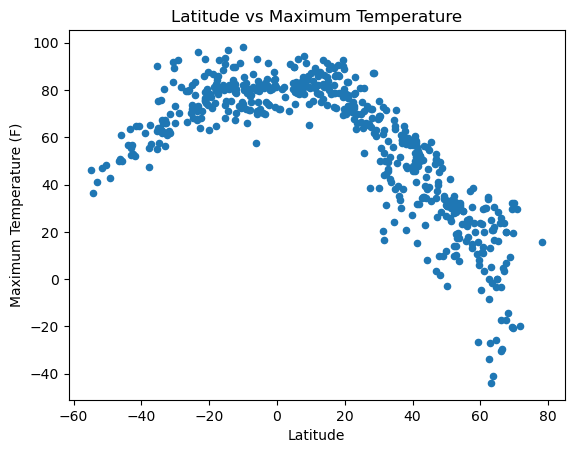

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

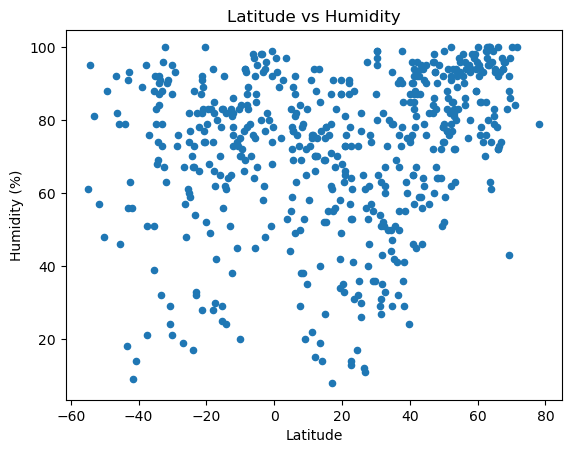

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

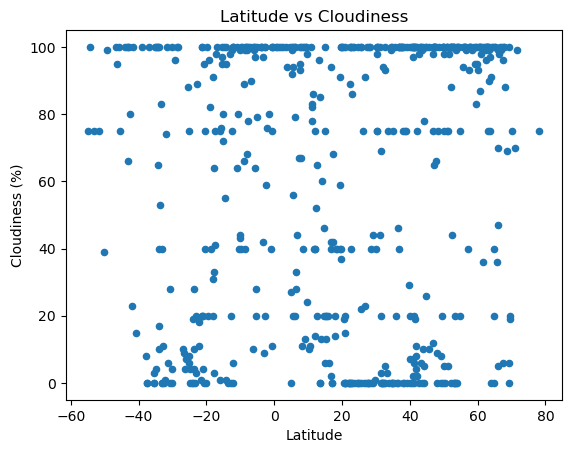

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

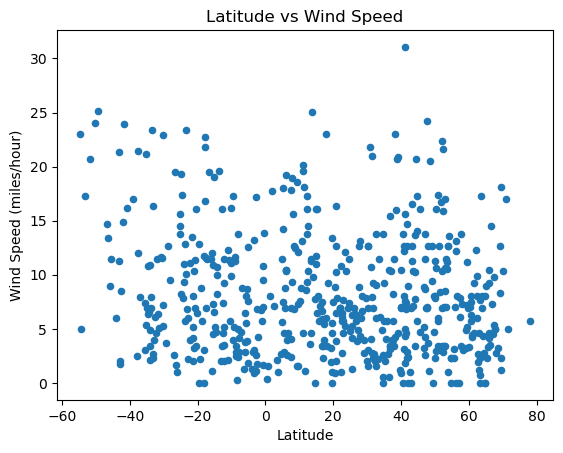

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression(hemisphere, weather_variable, ylabel):
    regression = linregress(hemisphere, weather_variable)
    fit = regression[0] * hemisphere + regression[1]
    print(f"The r-value is: {regression[2]}")
    
    plt.scatter(hemisphere, weather_variable)
    plt.plot(hemisphere, fit, "r--", label=f"y={round(regression[0],2)}x + {round(regression[1],2)}")
    plt.legend()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Latitude")
    plt.show()    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wismar,53.9000,11.4667,31.24,89,100,1.01,DE,1701541765
2,borogontsy,62.6683,131.1683,-33.83,100,100,2.71,RU,1701541768
4,constantia,44.1833,28.6500,56.08,79,78,13.69,RO,1701541770
6,nyurba,63.2842,118.3319,-43.87,100,90,0.69,RU,1701541772
7,stanley,54.8680,-1.6985,28.76,96,20,2.30,GB,1701541624


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,inhambane,-23.8650,35.3833,73.02,67,0,11.01,MZ,1701541767
3,adamstown,-25.0660,-130.1015,71.80,82,8,14.50,PN,1701541550
5,blackmans bay,-43.0167,147.3167,55.53,91,100,1.99,AU,1701541771
8,port-aux-francais,-49.3500,70.2167,42.80,88,99,25.19,TF,1701541548
12,saint-joseph,-21.3667,55.6167,75.58,91,100,5.21,RE,1701541778


In [17]:
#======>>>> COPY PASC
# Assign latitudes in each hemisphere to a variable
northern = northern_hemi_df['Lat']
southern = southern_hemi_df['Lat']

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8872878354778727


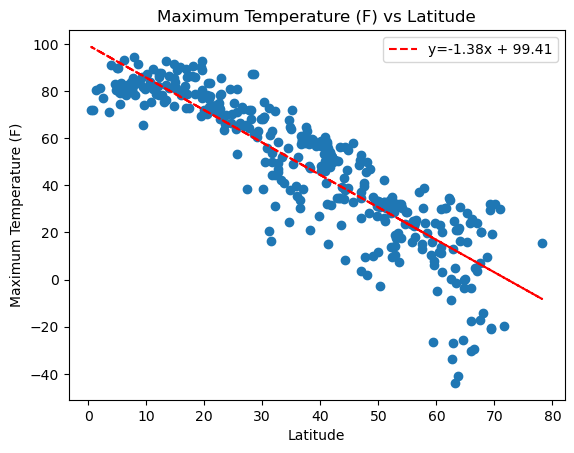

In [18]:
# Linear regression on Northern Hemisphere
regression(northern, northern_hemi_df['Max Temp'], "Maximum Temperature (F)")

The r-value is: 0.6793357857261886


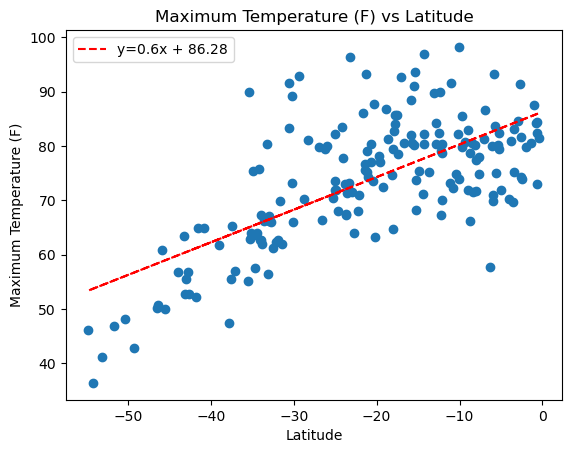

In [19]:
# Linear regression on Southern Hemisphere
regression(southern, southern_hemi_df['Max Temp'], "Maximum Temperature (F)")

**Discussion about the linear relationship:** 
As the latitude increases, temperatu goes higher. There is a strong positive correlation between temperature and latitude

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4124464501705531


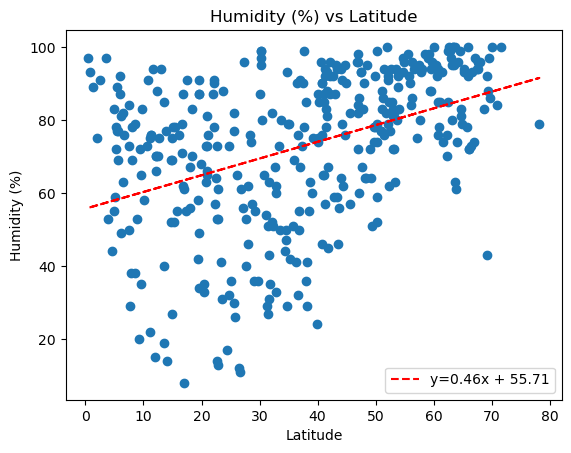

In [20]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Humidity'], "Humidity (%)")

The r-value is: 0.14536824056387032


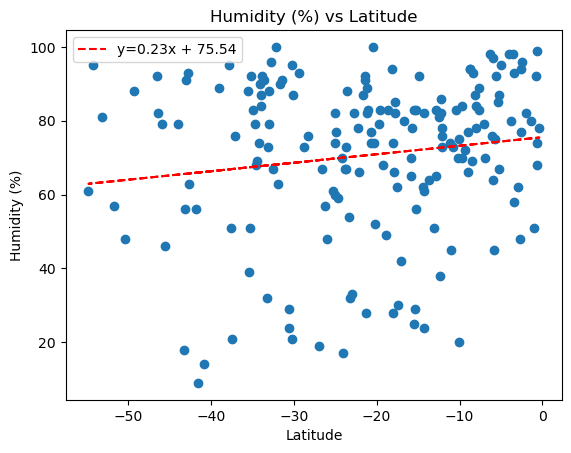

In [21]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Humidity'], "Humidity (%)")

**Discussion about the linear relationship:** very  weak positive correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18176139378976683


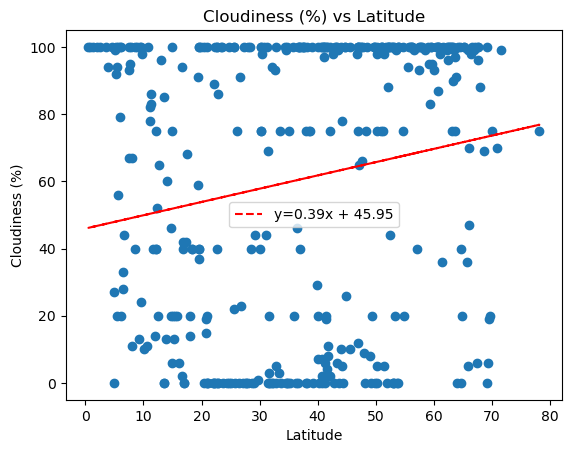

In [22]:
# Northern Hemisphere
# YOUR CODE HERE


#===>>>> PASC COPY
# Northern Hemisphere
regression(northern, northern_hemi_df['Cloudiness'], "Cloudiness (%)")

The r-value is: 0.13771429318023218


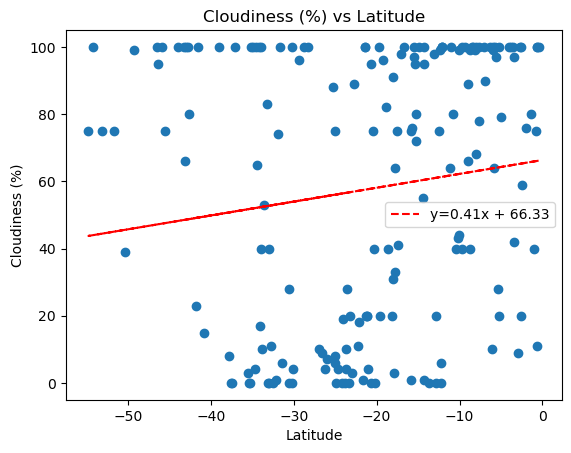

In [23]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Cloudiness'], "Cloudiness (%)")

**Discussion about the linear relationship:** weak relationship between the cloudliness percentage and  the latitude
however positive, as the cloudiness percentage tends to increase, the latitude also tends to increase, but on a very weak ssensitivity

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09089437322789155


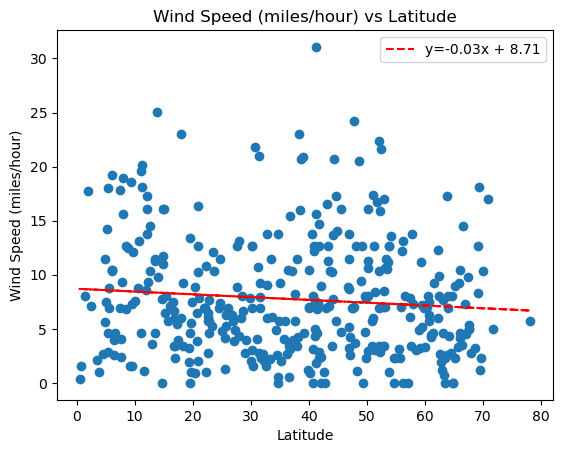

In [24]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

The r-value is: -0.32798830679827573


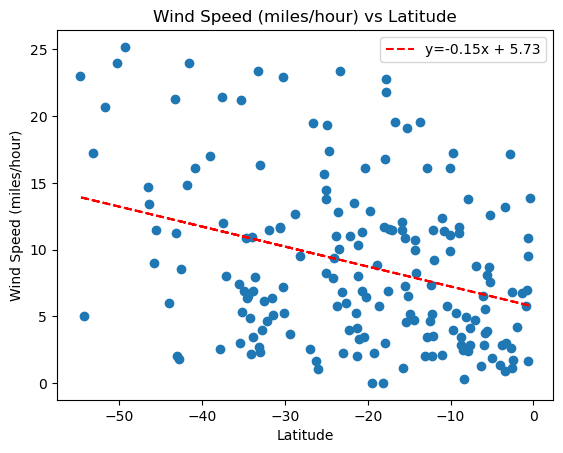

In [25]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

**Discussion about the linear relationship:** wind speed tends to increase as the latitude tends to decrease, and vice versa. this result shows a moderately weak negative linear relationship between these two variables